<a href="https://colab.research.google.com/github/lazy-wolf/python-class-notes/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 05-10-2023
```








**Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from google.colab import drive
from sklearn.metrics import accuracy_score

**Mounting Google Drive in Google Colab**

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Load custom images from Google Drive**

In [4]:
# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/TME_6015/Assignment_1'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.jpg'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              img = img.rotate(-90)
              threshold = 100
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Preprocess the custom images
custom_images = custom_images / 255.0

/content/drive/MyDrive/TME_6015/Assignment_1/7
filename 7-1.jpg
filename 7-2.png
filename 7-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/1
filename 1-1.jpg
filename 1-2.png
filename 1-3`.png
/content/drive/MyDrive/TME_6015/Assignment_1/2
filename 2-1.jpg
filename 2-2.png
filename 2-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/3
filename 3-1.jpg
filename 3-2.png
filename 3-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/4
filename 4-1.jpg
filename 4-2.png
filename 4-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/5
filename 5-1.jpg
filename 5-2.png
filename 5-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/6
filename 6-1.jpg
filename 6-2.png
filename 6-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/8
filename 8-1.jpg
filename 8-2.png
filename 8-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/9
filename 9-1.jpg
filename 9-2.png
filename 9-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/0
filename 0-1.jpg
filename 0-2.png
filename 0-3.png


In [5]:
display_image = custom_images[2] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img

**Plotting the data**

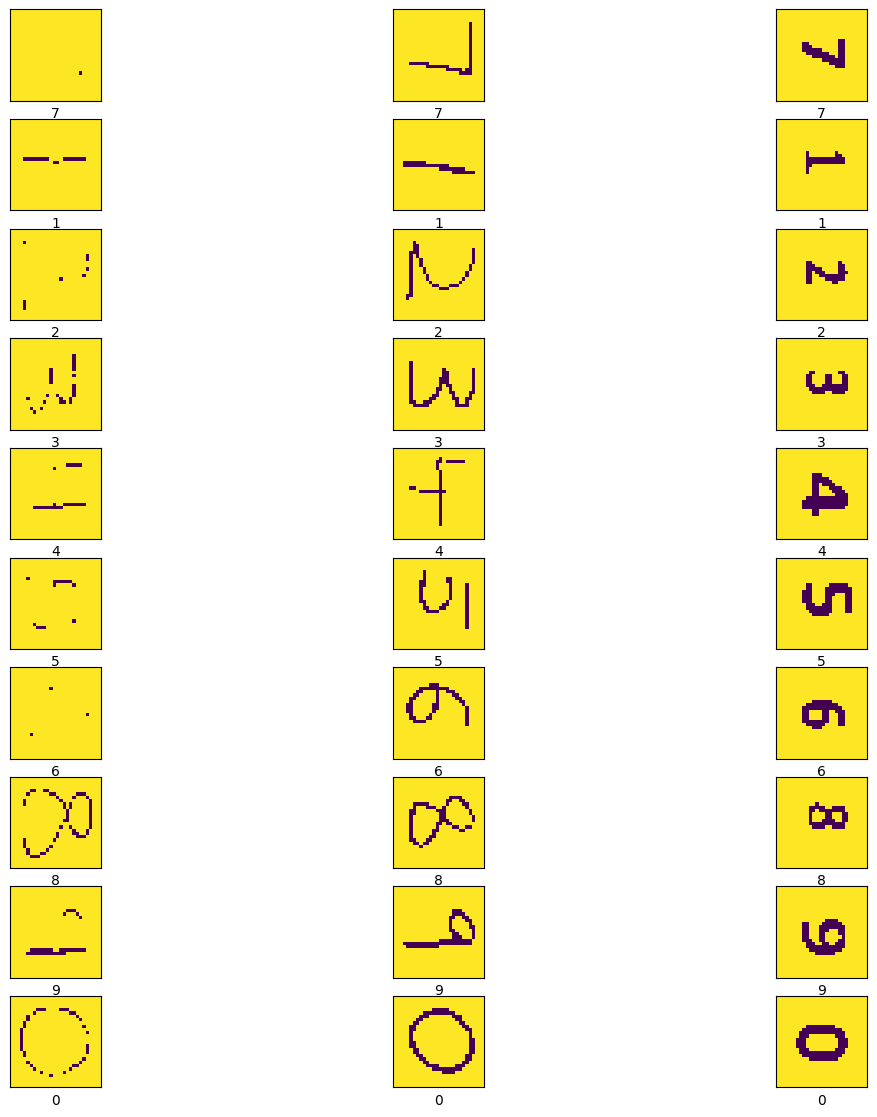

In [6]:
plt.figure(figsize=(14,14))
for i in range(30):
    plt.subplot(10,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(custom_images[i])
    plt.xlabel(custom_labels[i])
plt.show()

**Load and Preprocess MNIST Dataset**

In [7]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Adding the custom images and labels to the original MNIST dataset**

In [8]:
# Add the custom images and labels to the original MNIST dataset
x_train = np.concatenate((x_train, custom_images), axis=0)
y_train = np.concatenate((y_train, custom_labels), axis=0)

In [9]:
display_image = x_train[0] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)
img

**Create a Model**

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

**Compile and Train the Model**

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 86s 45ms/step - loss: 0.2517 - accuracy: 0.9428 - val_loss: 0.0639 - val_accuracy: 0.9806
Epoch 2/10
1876/1876 [==============================] - 67s 36ms/step - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.0595 - val_accuracy: 0.9812
Epoch 3/10
1876/1876 [==============================] - 66s 35ms/step - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.0668 - val_accuracy: 0.9795
Epoch 4/10
1876/1876 [==============================] - 66s 35ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0521 - val_accuracy: 0.9844
Epoch 5/10
1876/1876 [==============================] - 68s 36ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.0614 - val_accuracy: 0.9843
Epoch 6/10
1876/1876 [==============================] - 64s 34ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0764 - val_accuracy: 0.9823
Epoch 7/10
1876/1876 [==============================] - 66s 35ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0534 -

**Plot Training History**

313/313 - 2s - loss: 0.0510 - accuracy: 0.9888 - 2s/epoch - 8ms/step


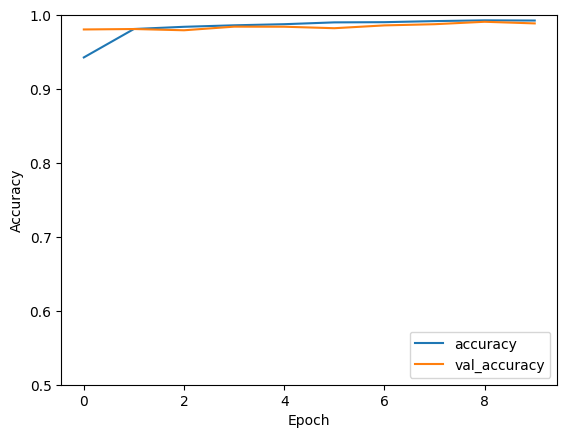

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [14]:
print(test_acc)

0.9887999892234802


**Detect Overfitting**

---

We will Train the model for more epochs until you observe overfitting in the training data (i.e., when validation accuracy starts decreasing while training accuracy keeps increasing).

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1876/1876 [==============================] - 40s 21ms/step - loss: 0.5822 - accuracy: 0.8839 - val_loss: 0.1387 - val_accuracy: 0.9653
Epoch 2/25
1876/1876 [==============================] - 40s 21ms/step - loss: 0.0998 - accuracy: 0.9725 - val_loss: 0.0948 - val_accuracy: 0.9750
Epoch 3/25
1876/1876 [==============================] - 37s 20ms/step - loss: 0.0682 - accuracy: 0.9800 - val_loss: 0.0794 - val_accuracy: 0.9789
Epoch 4/25
1876/1876 [==============================] - 38s 20ms/step - loss: 0.0527 - accuracy: 0.9847 - val_loss: 0.0880 - val_accuracy: 0.9768
Epoch 5/25
1876/1876 [==============================] - 38s 20ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0955 - val_accuracy: 0.9745
Epoch 6/25
1876/1876 [==============================] - 38s 20ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0999 - val_accuracy: 0.9778
Epoch 7/25
1876/1876 [==============================] - 40s 22ms/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 0.1082 - val_accura

313/313 - 2s - loss: 0.2557 - accuracy: 0.9797 - 2s/epoch - 5ms/step


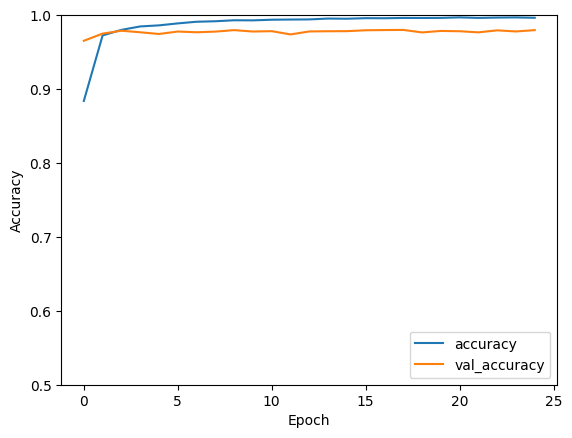

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [22]:
print(test_acc)

0.9797000288963318


In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
1876/1876 [==============================] - 75s 39ms/step - loss: 0.2223 - accuracy: 0.9449 - val_loss: 0.0588 - val_accuracy: 0.9820
Epoch 2/25
1876/1876 [==============================] - 68s 36ms/step - loss: 0.0642 - accuracy: 0.9805 - val_loss: 0.0618 - val_accuracy: 0.9808
Epoch 3/25
1876/1876 [==============================] - 73s 39ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0514 - val_accuracy: 0.9835
Epoch 4/25
1876/1876 [==============================] - 67s 36ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0379 - val_accuracy: 0.9881
Epoch 5/25
1876/1876 [==============================] - 69s 37ms/step - loss: 0.0346 - accuracy: 0.9895 - val_loss: 0.0576 - val_accuracy: 0.9837
Epoch 6/25
1876/1876 [==============================] - 70s 38ms/step - loss: 0.0344 - accuracy: 0.9896 - val_loss: 0.0413 - val_accuracy: 0.9884
Epoch 7/25
1876/1876 [==============================] - 68s 36ms/step - loss: 0.0292 - accuracy: 0.9917 - val_loss: 0.0490 -

313/313 - 6s - loss: 0.0921 - accuracy: 0.9888 - 6s/epoch - 19ms/step


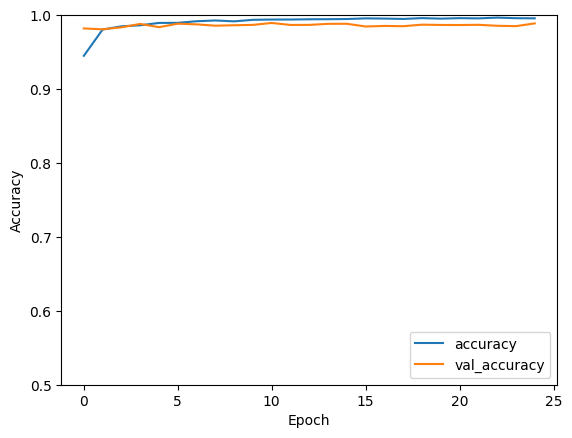

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [28]:
print(test_acc)

0.9887999892234802


**Experiment with Different Configurationst**

**Model - 1**

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                346176    
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 42s 22ms/step - loss: 0.6042 - accuracy: 0.8715 - val_loss: 0.1330 - val_accuracy: 0.9645
Epoch 2/10
1876/1876 [==============================] - 35s 19ms/step - loss: 0.1004 - accuracy: 0.9718 - val_loss: 0.0873 - val_accuracy: 0.9757
Epoch 3/10
1876/1876 [==============================] - 38s 20ms/step - loss: 0.0639 - accuracy: 0.9808 - val_loss: 0.0998 - val_accuracy: 0.9711
Epoch 4/10
1876/1876 [==============================] - 37s 20ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0783 - val_accuracy: 0.9791
Epoch 5/10
1876/1876 [==============================] - 37s 20ms/step - loss: 0.0379 - accuracy: 0.9878 - val_loss: 0.0816 - val_accuracy: 0.9804
Epoch 6/10
1876/1876 [==============================] - 35s 18ms/step - loss: 0.0332 - accuracy: 0.9901 - val_loss: 0.0865 - val_accuracy: 0.9788
Epoch 7/10
1876/1876 [==============================] - 34s 18ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.1066 -

313/313 - 2s - loss: 0.1222 - accuracy: 0.9782 - 2s/epoch - 5ms/step


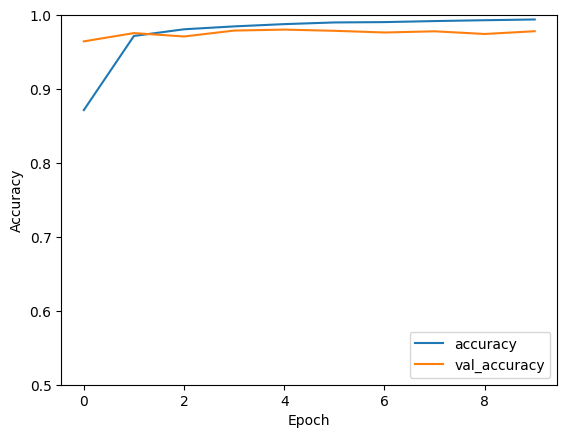

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [37]:
print(test_acc)

0.9782000184059143


**Model - 2**

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 flatten_5 (Flatten)         (None, 7744)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                495680    
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                      

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 69s 36ms/step - loss: 0.2588 - accuracy: 0.9535 - val_loss: 0.0957 - val_accuracy: 0.9705
Epoch 2/10
1876/1876 [==============================] - 65s 35ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0504 - val_accuracy: 0.9851
Epoch 3/10
1876/1876 [==============================] - 70s 37ms/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.0558 - val_accuracy: 0.9827
Epoch 4/10
1876/1876 [==============================] - 66s 35ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0592 - val_accuracy: 0.9837
Epoch 5/10
1876/1876 [==============================] - 66s 35ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0738 - val_accuracy: 0.9804
Epoch 6/10
1876/1876 [==============================] - 68s 36ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0581 - val_accuracy: 0.9854
Epoch 7/10
1876/1876 [==============================] - 67s 36ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0710 -

313/313 - 3s - loss: 0.0834 - accuracy: 0.9834 - 3s/epoch - 8ms/step


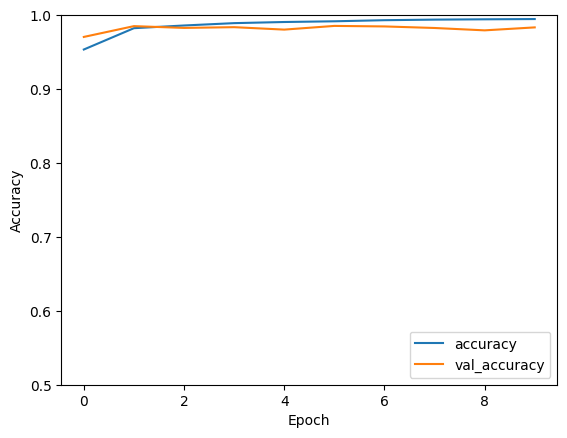

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [43]:
print(test_acc)

0.9833999872207642


**Create a Custom Test Set**

In [44]:
custom_test_images = []
custom_test_labels = []
folder_path = '/content/drive/MyDrive/TME_6015/Assignment_1_Custom_Test_Data'
for filename in os.listdir(folder_path):
  print('filename : ', filename)
  if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.jpg') or filename.endswith('.JPEG') or filename.endswith('.jpeg'):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert('L')
    img = img.resize((28, 28))
    threshold = 100
    img = img.point(lambda p: p > threshold and 255)
    img_array = np.array(img)
    custom_test_images.append(img_array)
    custom_test_labels.append(int(filename[0]))

# Convert the list of custom images and labels to numpy arrays
custom_test_images = np.array(custom_test_images)
custom_test_labels = np.array(custom_test_labels)


filename :  1.png
filename :  2.png
filename :  3.png
filename :  4.png
filename :  5.png
filename :  6.png
filename :  7.png
filename :  8.png
filename :  9.png
filename :  0.png


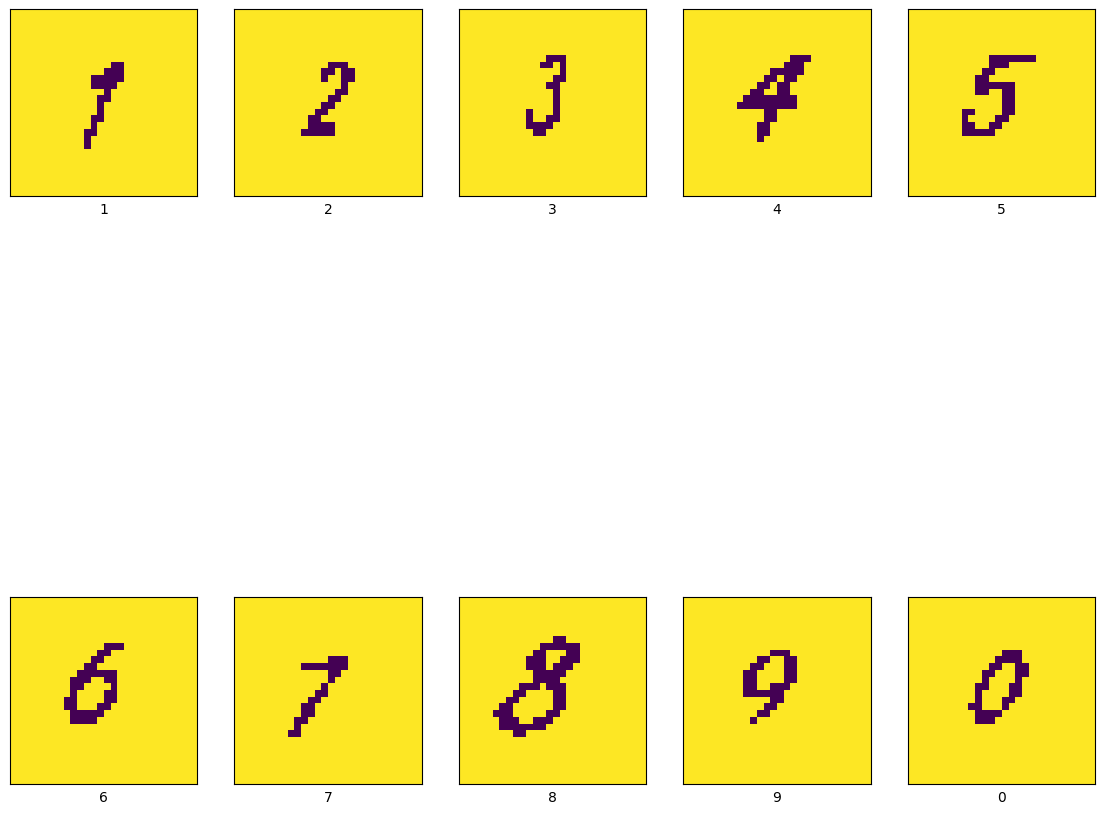

In [45]:
plt.figure(figsize=(14,14))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(custom_test_images[i])
    plt.xlabel(custom_test_labels[i])
plt.show()

In [46]:
custom_test_labels, len(custom_test_labels)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]), 10)

In [47]:
custom_test_pred=model.predict(custom_test_images)

1/1 [==============================] - 0s 181ms/step


In [48]:
custom_test_pred

array([[ 6.1765103e+00, -4.5405364e+00,  6.2470565e+00, -4.7796335e+00,
        -5.3547645e+00, -4.8685317e+00,  8.0070212e-02,  1.2969393e+00,
         3.5496953e+00, -1.6267378e+00],
       [ 2.2031515e+00, -7.2433519e+00,  8.2667656e+00, -6.7737455e+00,
        -7.2235436e+00, -8.9421701e+00, -6.6008477e+00,  1.7840594e+00,
         6.9462070e+00,  6.9293365e+00],
       [ 4.0531750e+00, -8.8745928e+00,  8.2959299e+00, -2.1644013e-01,
        -3.1125016e+00,  3.1743495e+00,  2.5575333e+00,  3.7646599e+00,
        -1.0663459e+00,  4.7471933e+00],
       [ 2.1695707e+00, -9.1078529e+00, -7.5145307e+00, -8.3635349e+00,
        -5.6793885e+00, -2.3983603e+00, -5.2989316e+00, -5.3807511e+00,
        -1.2778267e+00,  2.1454692e+00],
       [-3.4961738e-03, -1.9237282e+01,  2.5769455e+00, -1.0581409e+01,
        -7.9460126e-01,  3.2556510e+00, -1.5521056e+01,  1.6820333e+01,
        -1.0682586e+01,  7.0250802e+00],
       [ 4.1851239e+00, -1.9334669e+01, -5.9925585e+00, -1.3163803e+01,
   

In [49]:
custom_test_pred=list(map(lambda p: np.argmax(p), custom_test_pred))

In [50]:
for i in range(len(custom_test_pred)):
  print(custom_test_labels[i],custom_test_pred[i])

1 2
2 2
3 2
4 0
5 7
6 9
7 8
8 9
9 0
0 9
